<a href="https://colab.research.google.com/github/jeremiasjaure/modelos-de-clasificacion/blob/main/CcsDatosEconm%C3%ADa_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este presente trabajo constara de 2 partes:

La primera parte realizaremos un Analisis exploratorio de la base de datos que obutvimos de 'https://archive.ics.uci.edu/dataset/2/adult', la base de datos es sobre el censo de 1994 y se busca La tarea de predicción en determinar si el ingreso de una persona es superior a $50,000 al año. Por lo tanto vamos a detectar en un inicio si existen datos faltantes y crear gráficos tanto univaridos como vivariados para asi finalemnte observar si existe correlación en la cual lo determinaremos con un mapa de calor.

La segunda parte constara de que una vez que la base de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consistirá en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

In [6]:
# Instalar biblioteca
%pip install ucimlrepo
%pip install missingno

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd
import missingno as msno

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

## Dataset


In [2]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47621 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   fnlwgt          47621 non-null  int64 
 3   education       47621 non-null  object
 4   education-num   47621 non-null  int64 
 5   marital-status  47621 non-null  object
 6   occupation      47621 non-null  object
 7   relationship    47621 non-null  object
 8   race            47621 non-null  object
 9   sex             47621 non-null  object
 10  capital-gain    47621 non-null  int64 
 11  capital-loss    47621 non-null  int64 
 12  hours-per-week  47621 non-null  int64 
 13  native-country  47621 non-null  object
 14  income          47621 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.8+ MB


In [3]:
df.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


El df tiene datos faltantes

## Limpieza de datos y detección de datos faltantes

In [28]:
df.replace('>=50K.', '>=50K', inplace=True)

Se reemplaza el dato mal escrito

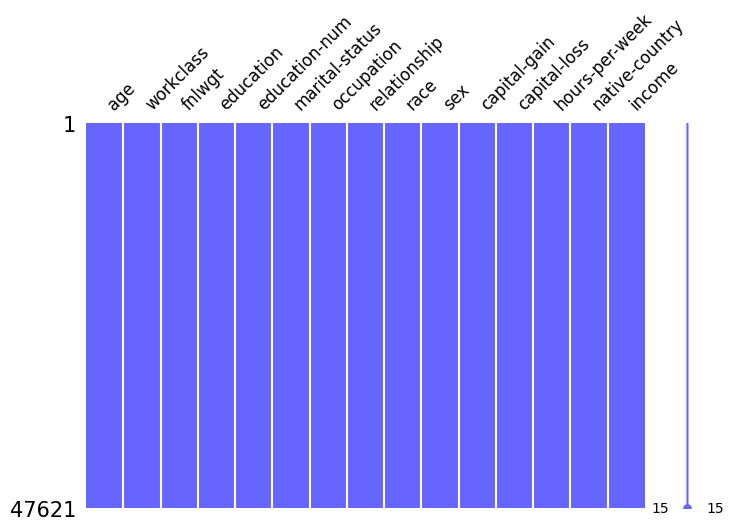

In [37]:
# Graficar los valores perdidos.
import matplotlib.pyplot as plt

msno.matrix(df, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.show()

se eliminan los datos debido a que son pocos datos

In [11]:
df.dropna(subset=['workclass'], how='any', inplace=True)
df.dropna(subset=['occupation'], how='any', inplace=True)
df.dropna(subset=['native-country'], how='any', inplace=True)

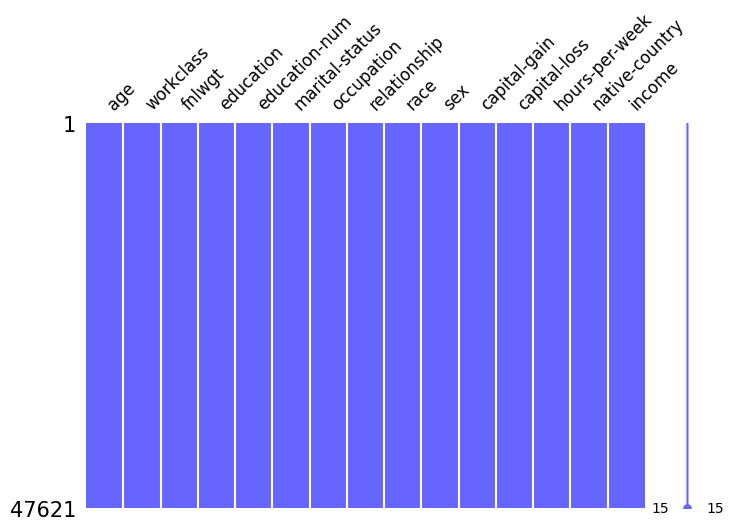

In [12]:
msno.matrix(df, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.show()

## Normalización
Los datos se normalizan para poder hacer bien los gráficos

## Gráficos univariados

### Histograma

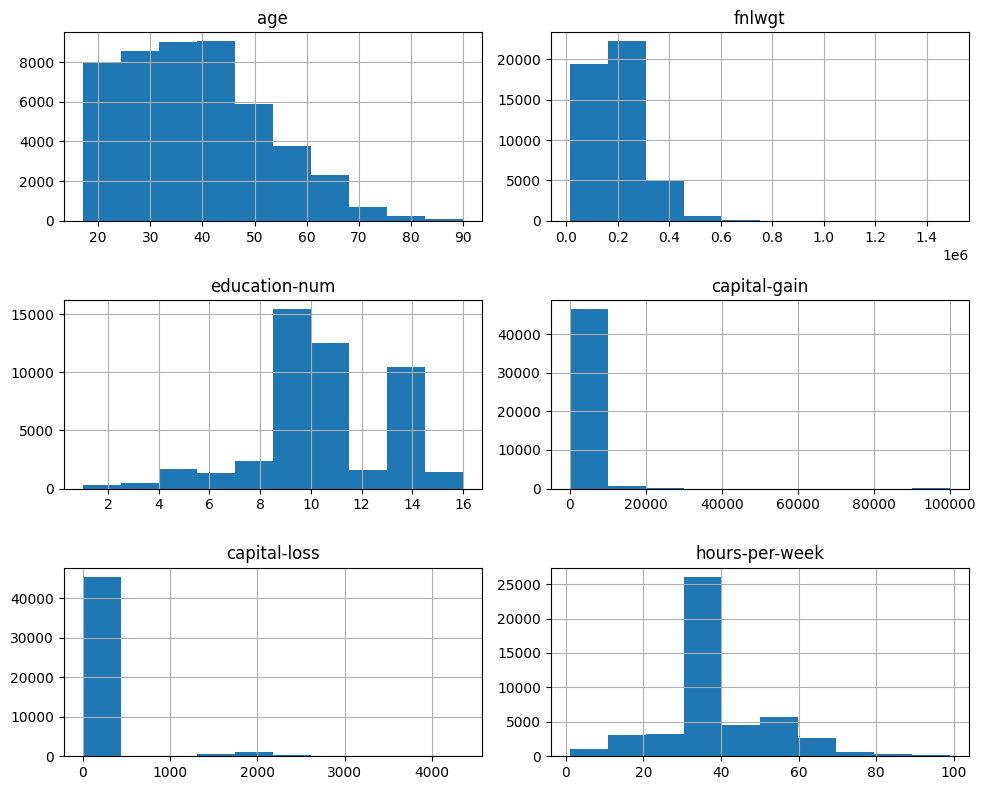

In [38]:

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

### Gráfico de barras

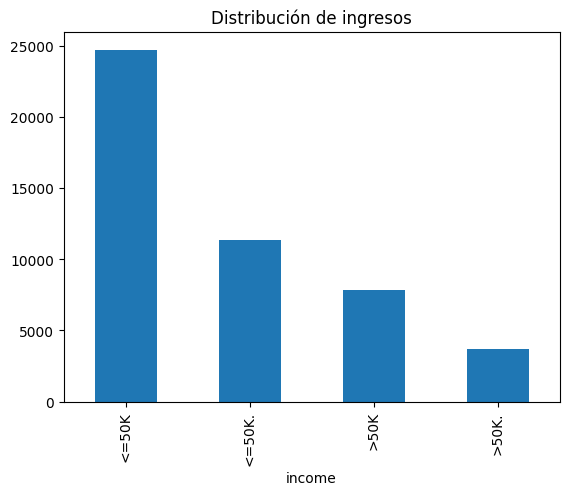

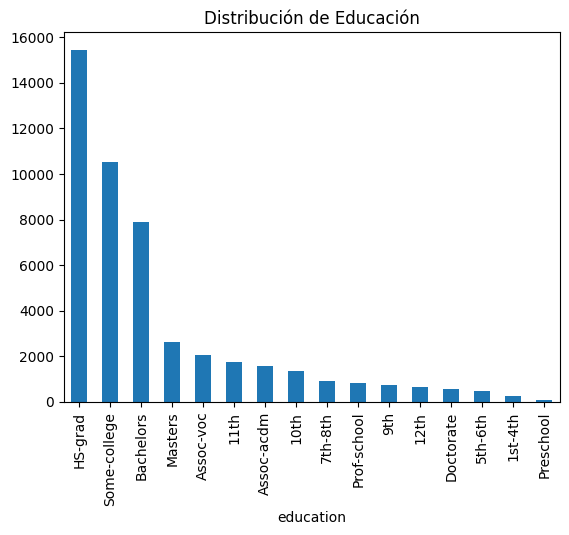

In [39]:
df['income'].value_counts().plot(kind='bar', title='Distribución de ingresos')
plt.show()

df['education'].value_counts().plot(kind='bar', title='Distribución de Educación')
plt.show()

## Análisis Bivariado

In [19]:
import pandas as pd
import matplotlib.pyplot as plt


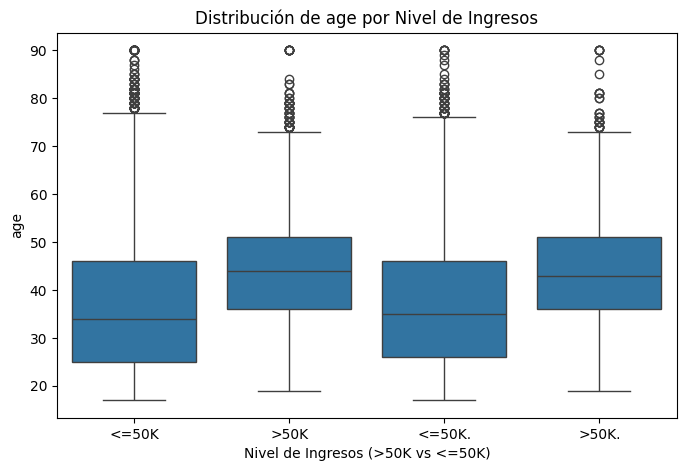

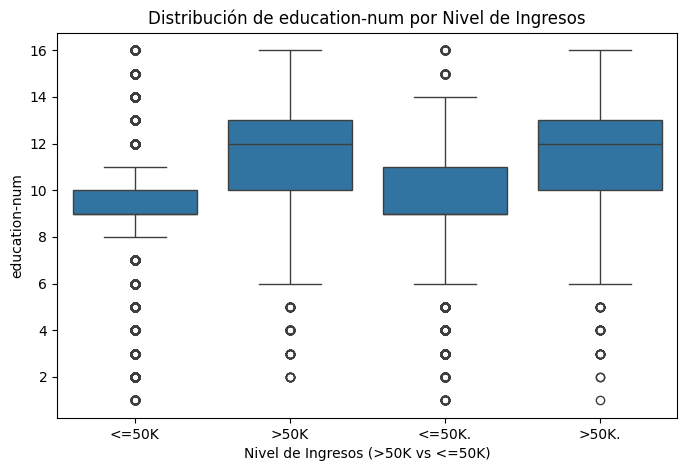

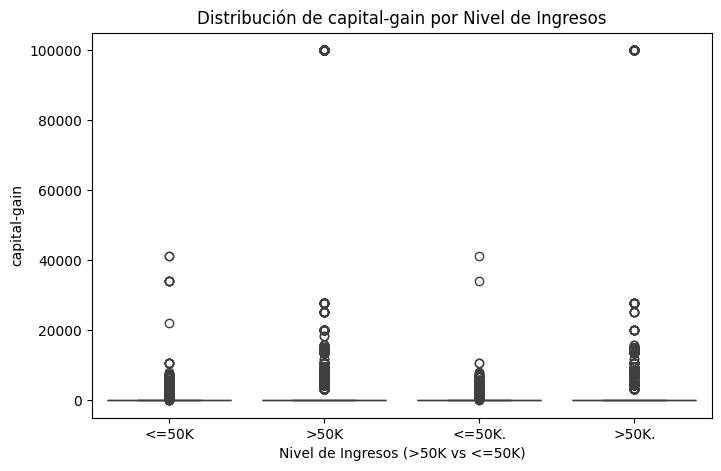

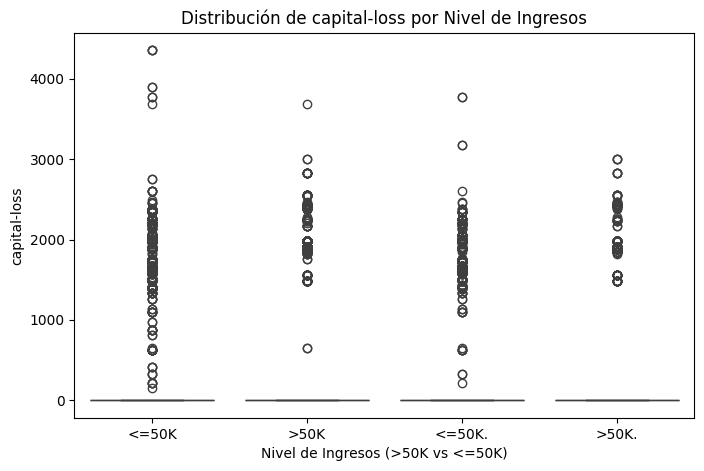

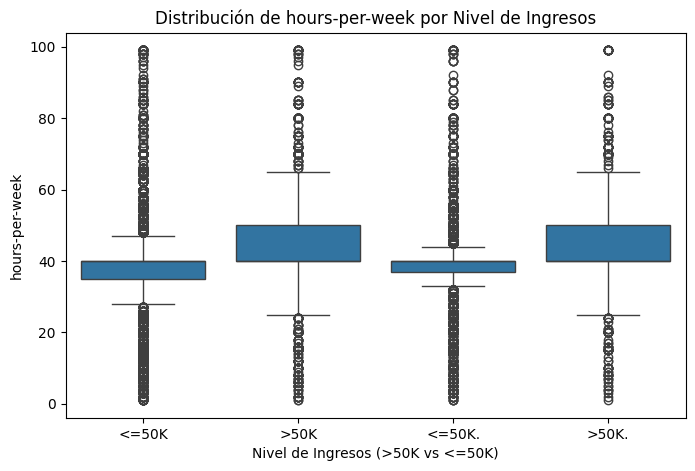

In [36]:
numeric_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f'Distribución de {col} por Nivel de Ingresos')
    plt.xlabel('Nivel de Ingresos (>50K vs <=50K)')
    plt.ylabel(col)
    plt.show()


 * age: Parece haber una ligera tendencia a que las personas con ingresos >50K sean un poco mayores en promedio, aunque la dispersión es similar.
 * education-num: Las personas con ingresos >50K tienen un número de educación significativamente mayor en promedio, lo que sugiere que la educación es un factor importante.
 * capital-gain y capital-loss: Podemos observan muchos valores atípicos, pero en promedio, las personas con ingresos >50K tienden a tener valores de capital-gain más altos y capital-loss más bajos.
 * hours-per-week: Las personas con ingresos >50K tienden a trabajar más horas por semana en promedio.


### Correlación

In [41]:
import seaborn as sns
import numpy as np

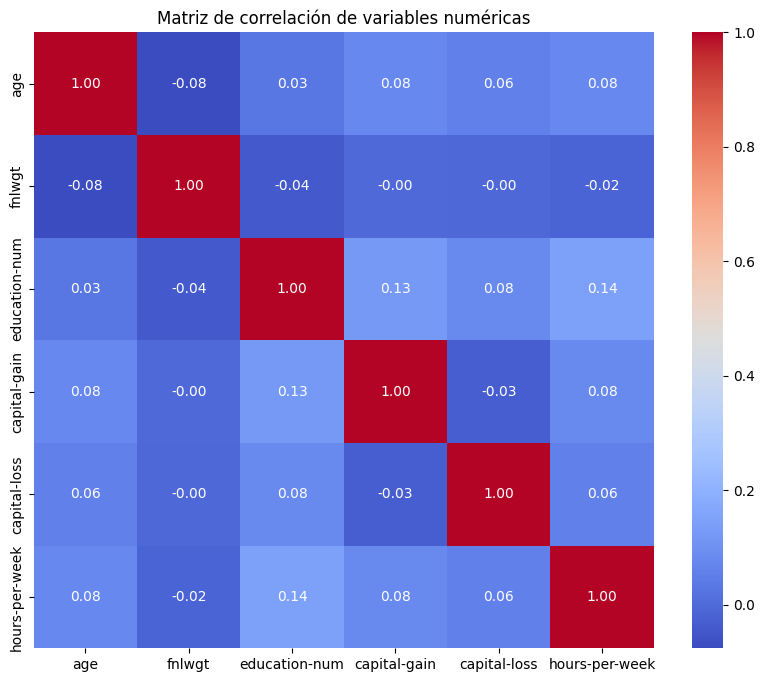

In [43]:
numeric_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación de variables numéricas')
plt.show()

Casi no hay correlación entre variables

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**